# Developed notebook for synthetic test of multi-domain cross-correlation

In [1]:
# Import all required modules
import sys, time, scipy, numpy
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
# Writing the path for source codes
mypath = sys.path.append('/home/delimar/Documents/sources/')

**ABOUT THE CELL ABOVE, IF YOU WILL RUN IN ANOTHER ENVIRONMENT, PLEASE ADD YOUR MAIN PATH, OTHERWISE WILL NOT WORK!**

In [3]:
# Define number of points and data shape
nx, ny = 50, 50
shape = (nx, ny)

In [4]:
# Importing the grid creation module
from codes import grids

In [5]:
# Creating a regular grid
area = (-5000., 5000., -5000., 5000.)
xo, yo, zo = grids.regular_grid(area, shape, -150.)

In [6]:
# Define inclination and declination of the regional magnetic field
incf, decf, incs, decs = 5., 70., 0., 0.

In [7]:
# Define the dike models
dikemodel = [-500., 500., -2500., 2500., 200., 3000.]

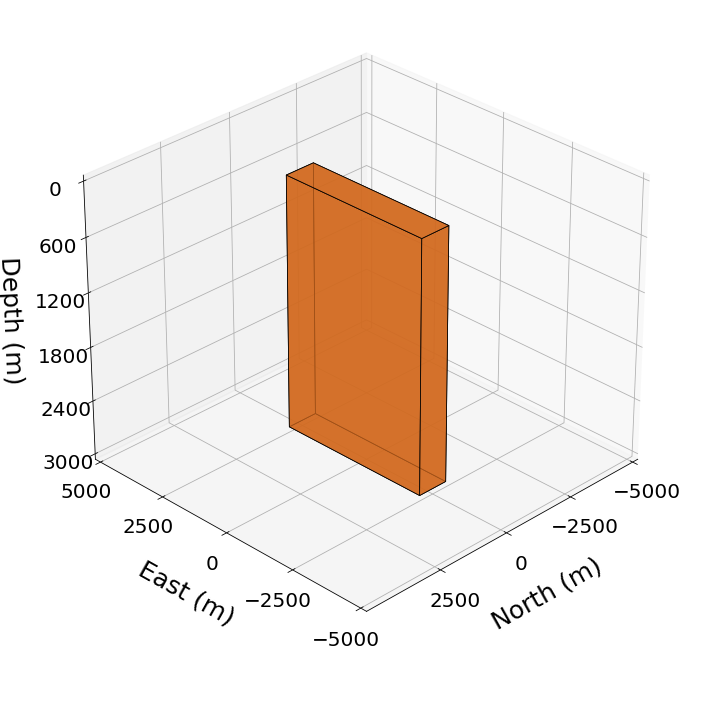

In [8]:
# Plot the main 3D source
figure = pyplot.figure(figsize=(10,10))

ax = figure.gca(projection = '3d')
#ax.set_title('Vertical dike model', size = 18)

x1, x2, y1, y2, z1, z2 = dikemodel[:6]
v = numpy.array([[x1, y1, z2], [x1, y2, z2], [x2, y2, z2], [x2, y1, z2], 
                 [x1, y1, z1], [x1, y2, z1], [x2, y2, z1], [x2, y1, z1]])
vert =  [[v[0],v[1],v[2],v[3]], 
         [v[0],v[1],v[5],v[4]], 
         [v[1],v[2],v[6],v[5]],
         [v[2],v[3],v[7],v[6]], 
         [v[3],v[0],v[4],v[7]], 
         [v[4],v[5],v[6],v[7]]]

fig01 = Poly3DCollection(vert, alpha = 0.75, linewidths = 0.75, edgecolors = 'k')
fig01.set_facecolor('chocolate')
ax.add_collection3d(fig01)

# Define the scale of the projection
x_scale = 1.2
y_scale = 1.2
z_scale = 1.
scale=numpy.diag([x_scale, y_scale, z_scale, 1.0])
scale=scale*(1.0/scale.max())
scale[3,3] = 1.
def short_proj():
    return numpy.dot(Axes3D.get_proj(ax), scale)
ax.get_proj = short_proj

# Labels
ax.set_xlabel('North (m)', size = 25, labelpad = 30)
ax.set_ylabel('East (m)', size = 25, labelpad = 30)
ax.set_zlabel('Depth (m)', size = 25, labelpad = 30)
ax.set_xlim(xo.min(), xo.max())
ax.set_ylim(yo.min(), yo.max())
ax.set_zlim(0., z2)
ax.set_xticks(numpy.arange(xo.min(), xo.max(), 2500))
ax.set_yticks(numpy.linspace(yo.min(), yo.max(), 5))
ax.set_zticks(numpy.linspace(0., z2, 6))
ax.tick_params(labelsize = 20, pad = 10)

# Visualization angle
ax.view_init(210, 135)

pyplot.tight_layout(True)
pyplot.savefig('figs/dikemodel-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/dikemodel-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [9]:
# Import the modules for calculating the total field anomaly
from codes import prism

In [10]:
# Calculate the total field anomaly due to the vertical dike model
tf = prism.prism_tf(xo, yo, zo, dikemodel, 2., incf, decf, incs, decs)

In [11]:
# Import the noise function
from codes.auxiliars import noise_normal_dist

In [12]:
# Adding some noise to the total field data
tf = noise_normal_dist(tf, 5., 0.05)

In [13]:
# import the statistical
from codes import statistical

In [14]:
# Analysis of the total field anomaly data
print 'Magnetic total field anomaly:'
_ = statistical.analysis(tf, 'nT')

Magnetic total field anomaly:
Minimum:    -201.1326 nT
Maximum:    136.4955 nT
Mean value: 0.7687 nT
Variation:  337.6281 nT


In [15]:
# Define the color scale value
tfmin = numpy.around(tf.min(), decimals = 1)
tfmax = numpy.around(tf.max(), decimals = 1)

In [16]:
from codes import plot

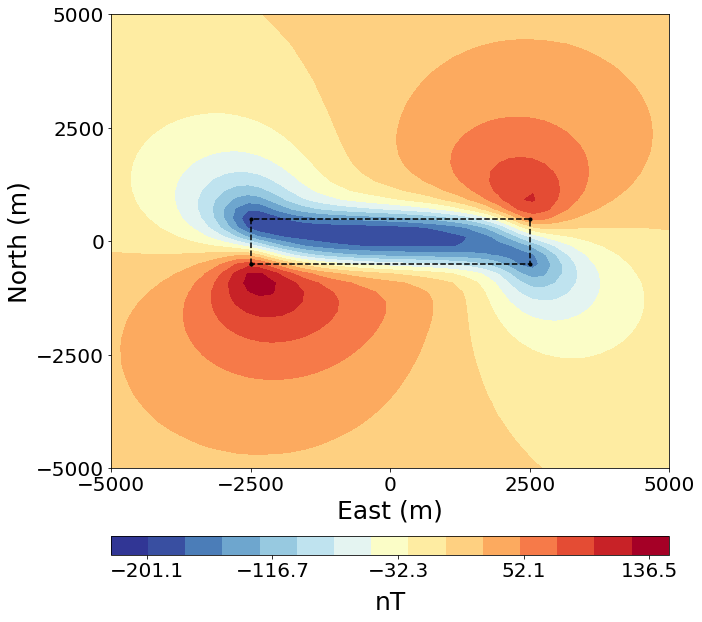

In [17]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape),  10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                15, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/totalfield-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/totalfield-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

pyplot.show()

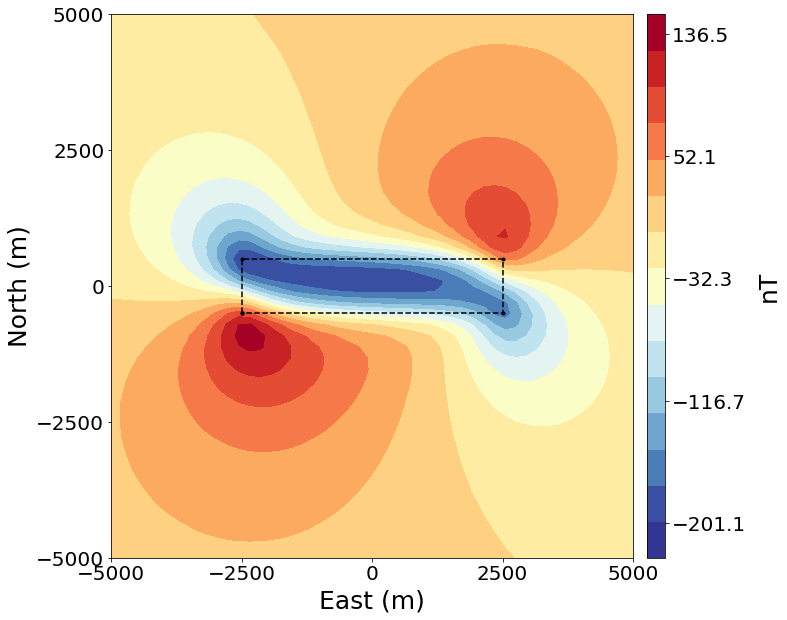

In [18]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape),  10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tf.reshape(shape), 
                15, vmin = tfmin, vmax = tfmax, cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(tfmin, tfmax, 5))
cb.set_clim(tfmin, tfmax)
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.legend(loc = 'upper left', fontsize = 'x-large')
pyplot.savefig('figs/totalfield-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/totalfield-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

pyplot.show()

In [19]:
# Reshaping the total field data for using RTP in FOurier domain
xobs = xo.reshape(shape)
yobs = yo.reshape(shape)
dobs = tf.reshape(shape)

In [20]:
# Importing the classical equivalent layer module
from codes import equivalentlayer

In [21]:
# Define the value of the equivalent layer
areal = area
shapel = (15, 15)
level = 1500.

In [22]:
# Building the equivalent layer
mylayer = equivalentlayer.layer(areal, shapel, level)

In [23]:
# Allocate the data values
mydata = [xo, yo, zo, tf]

In [24]:
# Calculate the predicted data
vec, fitted = equivalentlayer.fit_layer_mag(mydata, shape, mylayer, shapel, 0.0001, incf, decf, incs, decs)

In [25]:
# Import the scipy normalization
from scipy.stats import norm

In [26]:
# Calculated the residual and perfform a statiscal study
residuo = tf - fitted
res_mu = numpy.mean(residuo)
res_sigma = numpy.std(residuo)

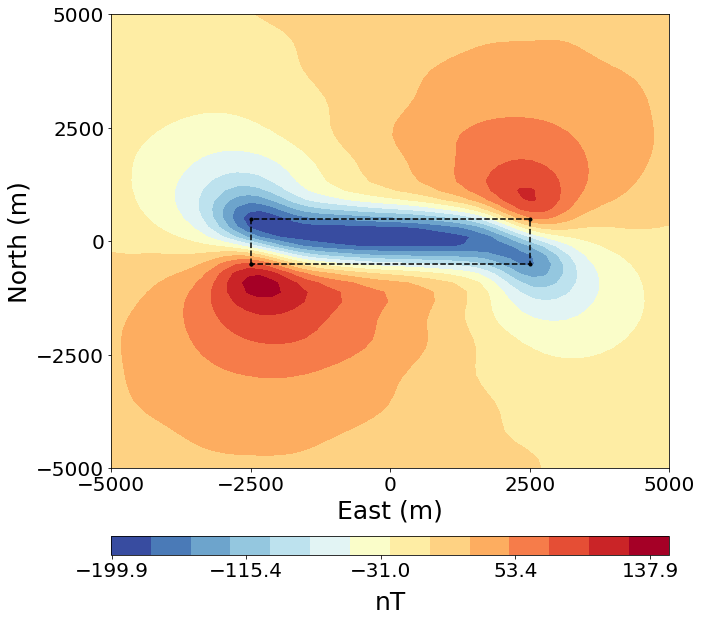

In [27]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
#                10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', 
#                   manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/fitted-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/fitted-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

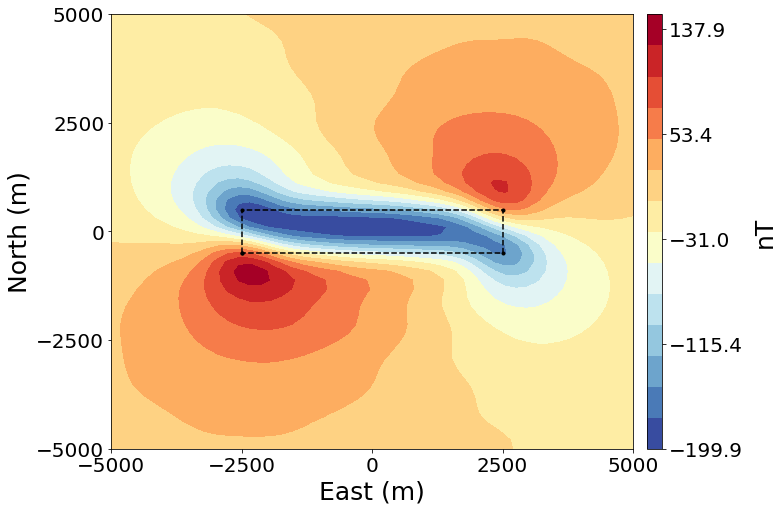

In [28]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
#                10, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 12, fmt = '%1.0f', 
#                   manual = [(-2550., -2500.), (2500., -2500.), (2500., 3500.), (3000., -2000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
#pyplot.savefig('figs/fitted-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/fitted-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


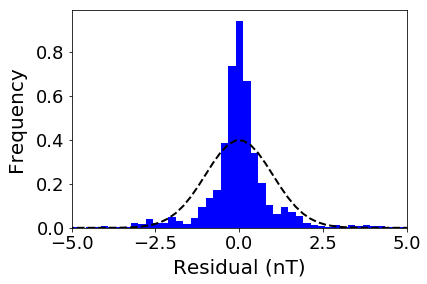

In [29]:
# Plotting the histogram of residual
s = (residuo - res_mu) / res_sigma
s = numpy.ravel(s)
nbins = int(numpy.max(s) - numpy.min(s))
n, bins, patches = pyplot.hist(s, 50, normed = True, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, numpy.mean(s), numpy.std(s))
pyplot.plot(bins, y_hist, 'k--', linewidth = 2)
#pyplot.text(3.5,0.25, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 12)
#pyplot.text(3.5,0.3, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 12)
pyplot.xlabel('Residual (nT)' , fontsize = 20, labelpad = 5)
pyplot.ylabel('Frequency', fontsize = 20, labelpad = 10)
pyplot.xlim(-5,5)
pyplot.xticks(numpy.arange(-5., 5 + 2.5, 2.5), fontsize = 18)
pyplot.yticks(fontsize = 18)
#pyplot.savefig('figs/histogram-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/histogram-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# (1) Conventional cross-correlation between total gradient and vertical gradient of the reduced to pole data (Dannemiller and Li, 2006)

In [30]:
# Define the search area for correlation
inclination = numpy.linspace(-90., 90., 91)
declination = numpy.linspace(-90., 90., 91)
dec, inc = numpy.meshgrid(declination, inclination)

In [31]:
# Create the empty vector --> WND means wavenumber domain
res_wnd = numpy.zeros_like(dec)

In [32]:
# Import the module of filtering potential field data
from codes import filtering, derivative

In [33]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i == 0. or d == 0.:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i + 0.25, d + 0.25)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp),
                                              derivative.zderiv(xobs, yobs, rtp))
        else:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i, d)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp), 
                                              derivative.zderiv(xobs, yobs, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

/home/delimar/Documents/sources/codes/auxiliars.py:251: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


Calculation process (in seconds): 33.043


In [34]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_wnd, 'no unit')

Minimum:    -0.4436 no unit
Maximum:    0.7033 no unit
Mean value: 0.2260 no unit
Variation:  1.1469 no unit


In [35]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_wnd == res_wnd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: 0.0 68.0


/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


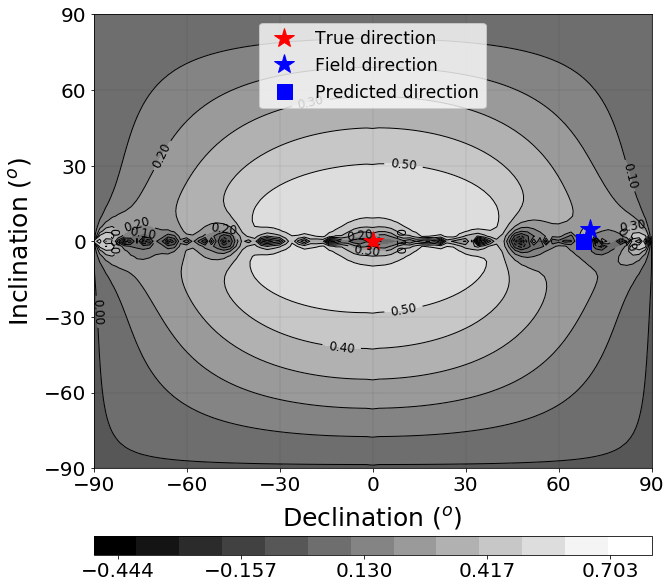

In [36]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 12, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-fourier-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-fourier-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

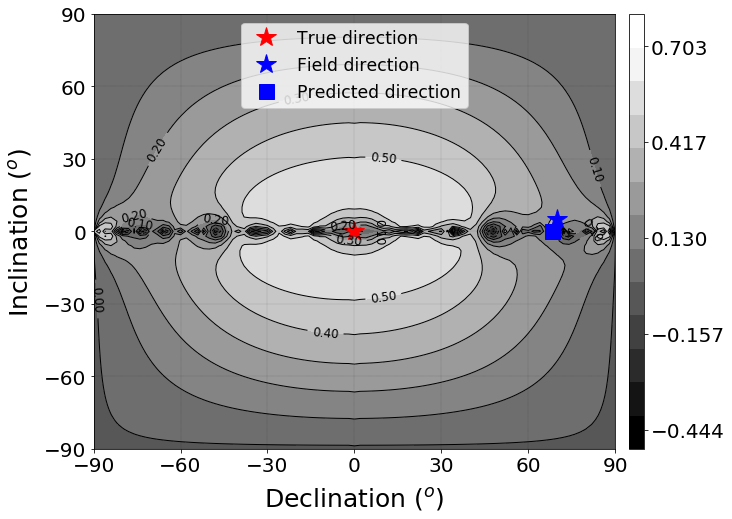

In [37]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,8))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 12, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-fourier-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-fourier-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


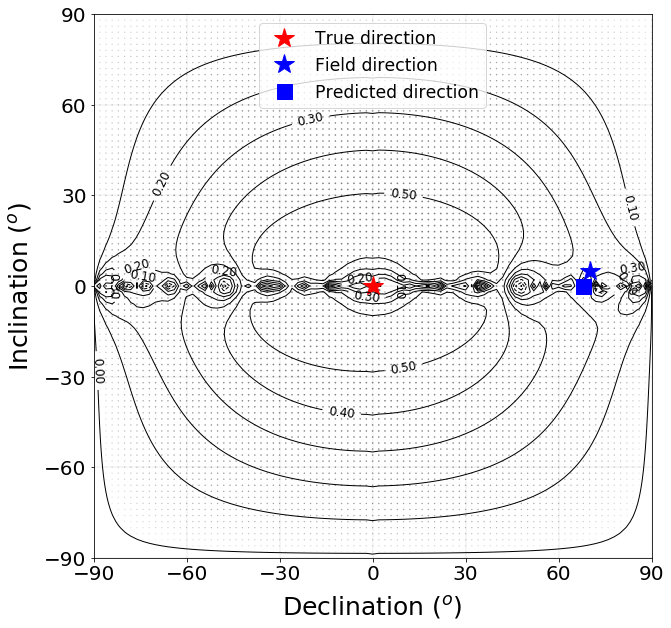

In [38]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(dec, inc, s = res_wnd, c = 'gray', vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-fourier-r1(scatter).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-fourier-r1(scatter).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [39]:
# Interpolate for the low latitude values
areai = (-20., 20., -90., 90)
shapei = (361, 181)
inci, deci = grids.regular_grid(areai, shapei)

In [40]:
# We have to interpolate the data just in order to make it smoother
datai = scipy.interpolate.griddata((inc.reshape(inc.size), dec.reshape(dec.size)), 
                 res_wnd.reshape(res_wnd.size), (inci, deci), method = 'cubic')

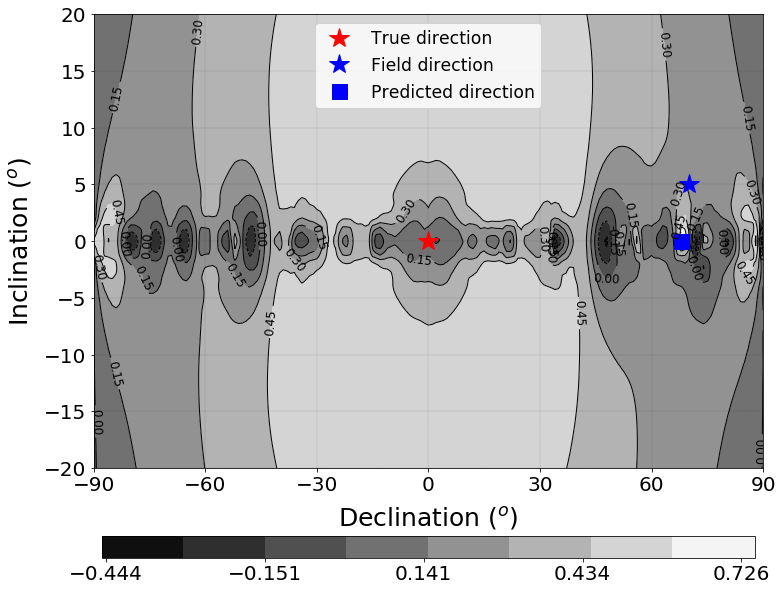

In [41]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/review01-zoom-correlation-fourier-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review01-zoom-correlation-fourier-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,8))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/north-synthetic-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/north-synthetic-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(deci.reshape(shapei), inci.reshape(shapei), s = datai.reshape(shapei), c = 'gray', vmin = datai.min(), vmax = datai.max())
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/north-synthetic-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/north-synthetic-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [42]:
# Apply the RTP by using the encountered direction
rtp_test = filtering.reduction(xobs, yobs, dobs, incf, decf, incm, decm)

In [43]:
# Computes the total and horizontal gradients
tga_test = derivative.totalgrad(xobs, yobs, rtp_test)
hga_test = derivative.zderiv(xobs, yobs, rtp_test)

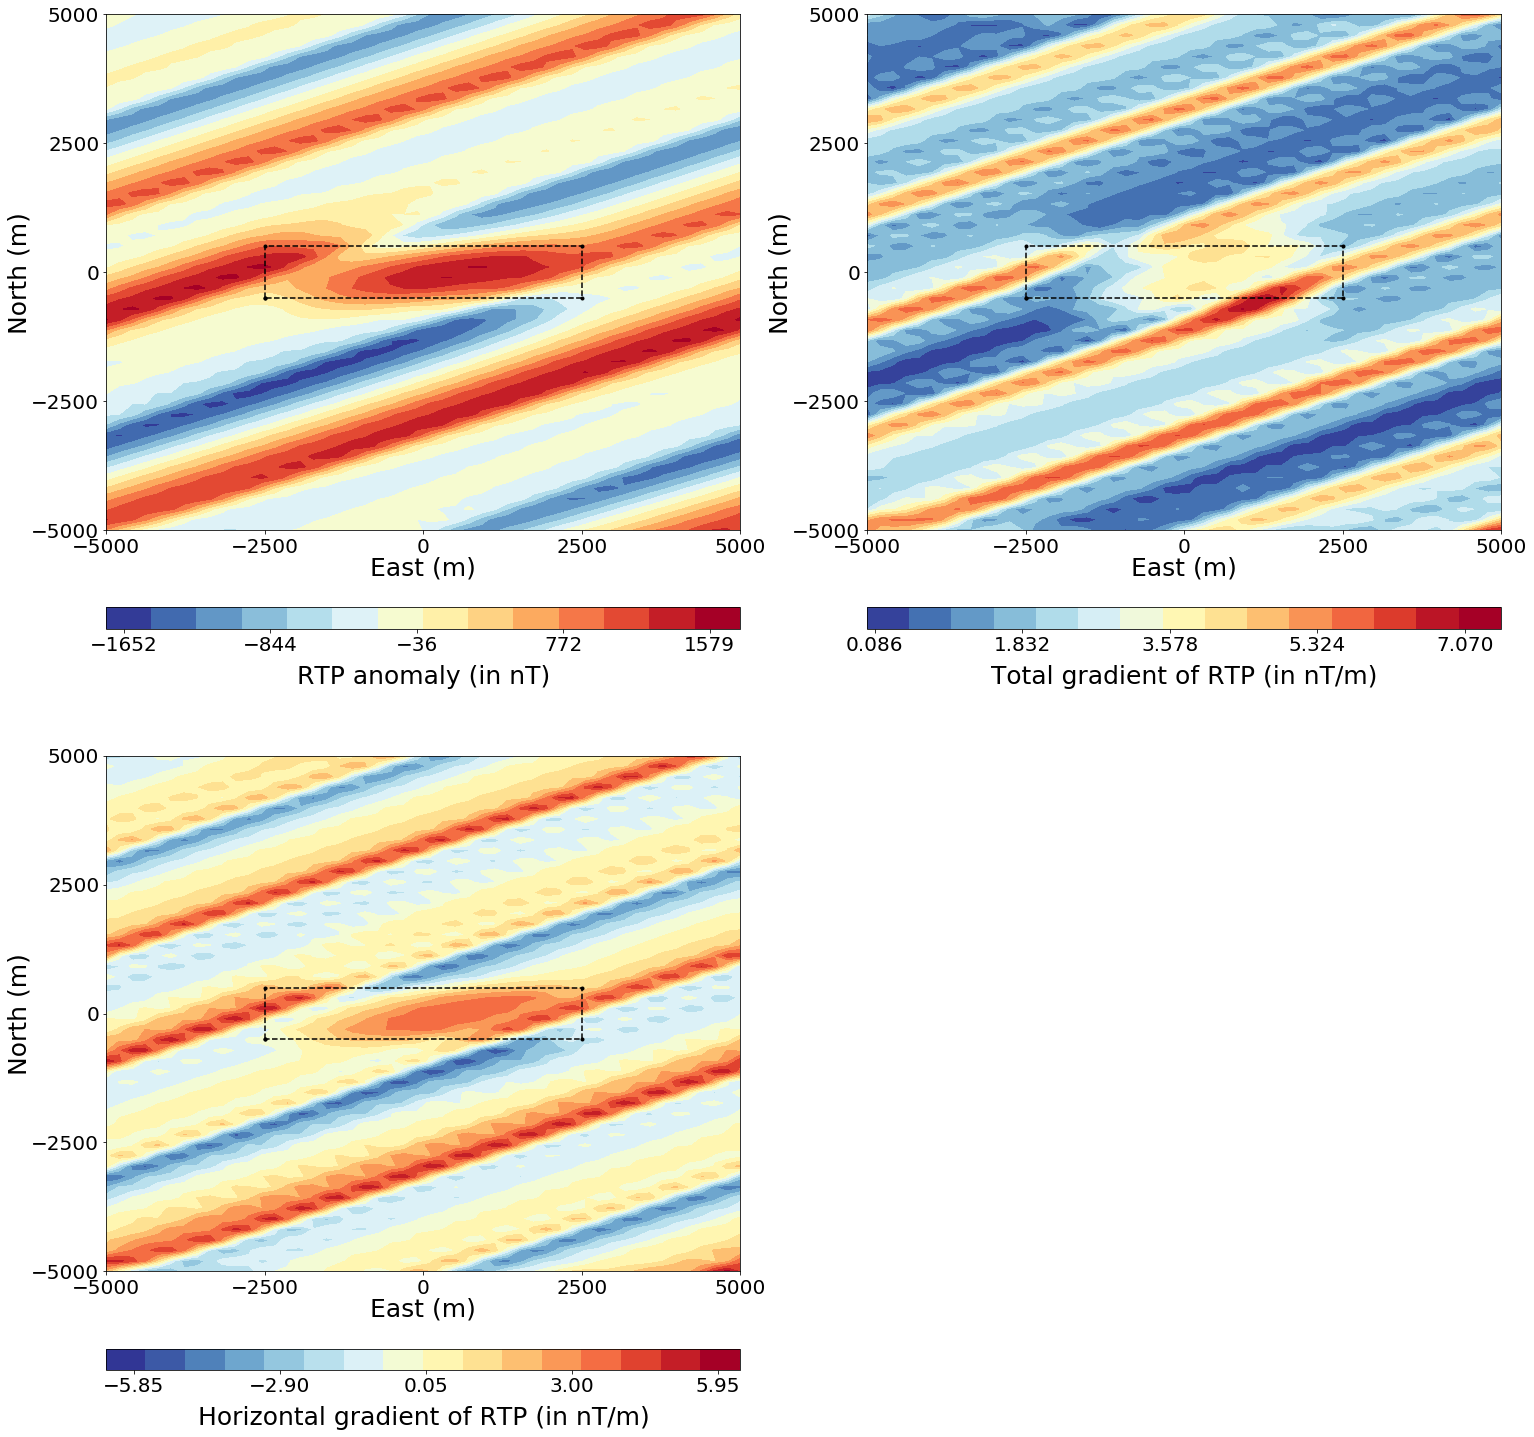

In [44]:
# Plotting the contour map
pyplot.figure(figsize=(25,25))

pyplot.subplot(2,2,1)
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp_test, 
                15, vmin = rtp_test.min(), vmax = rtp_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtp_test.min(), rtp_test.max(), 5))
cb.set_clim(rtp_test.min(), rtp_test.max())
cb.set_label('RTP anomaly (in nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.subplot(2,2,2)
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tga_test, 
                15, vmin = tga_test.min(), vmax = tga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(tga_test.min(), tga_test.max(), 5))
cb.set_clim(tga_test.min(), tga_test.max())
cb.set_label('Total gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.subplot(2,2,3)
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), hga_test, 
                15, vmin = hga_test.min(), vmax = hga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(hga_test.min(), hga_test.max(), 5))
cb.set_clim(hga_test.min(), hga_test.max())
cb.set_label('Horizontal gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/review02-rtp-tga-hga-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review02-rtp-tga-hga-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

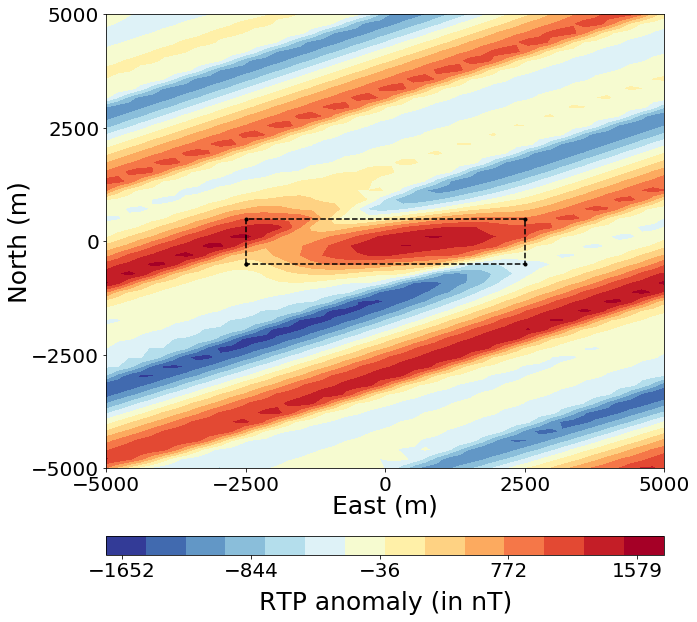

In [45]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp_test, 
                15, vmin = rtp_test.min(), vmax = rtp_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtp_test.min(), rtp_test.max(), 5))
cb.set_clim(rtp_test.min(), rtp_test.max())
cb.set_label('RTP anomaly (in nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.savefig('figs/review02a-rtp-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review02a-rtp-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

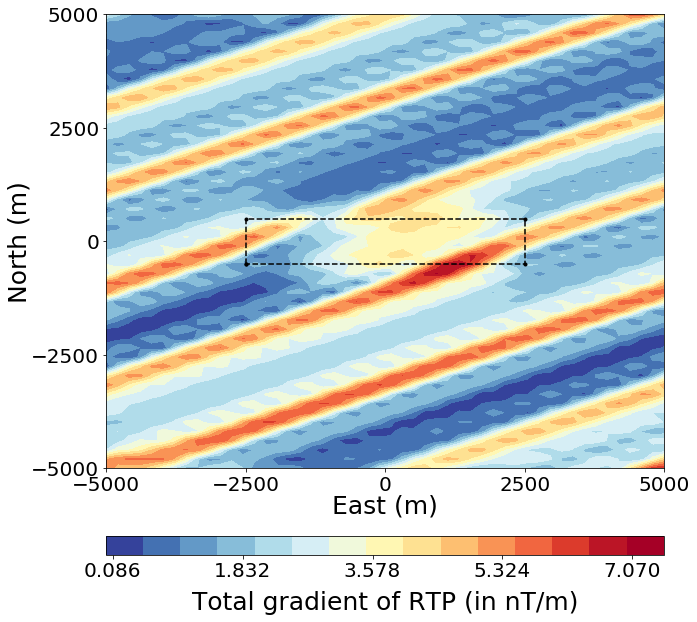

In [46]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tga_test, 
                15, vmin = tga_test.min(), vmax = tga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(tga_test.min(), tga_test.max(), 5))
cb.set_clim(tga_test.min(), tga_test.max())
cb.set_label('Total gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.savefig('figs/review02b-tga-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review02b-tga-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

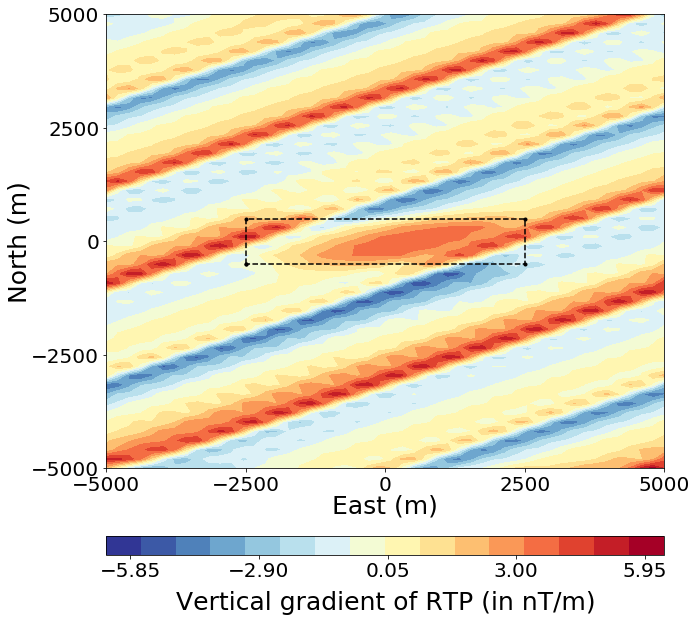

In [47]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), hga_test, 
                15, vmin = hga_test.min(), vmax = hga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(hga_test.min(), hga_test.max(), 5))
cb.set_clim(hga_test.min(), hga_test.max())
cb.set_label('Vertical gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/review02b-hga-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review02b-hga-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [48]:
# Test the encountered direction by applying the reduction to pole
rtpfd = filtering.reduction(xobs, yobs, dobs, incf, decf, incm, decm)

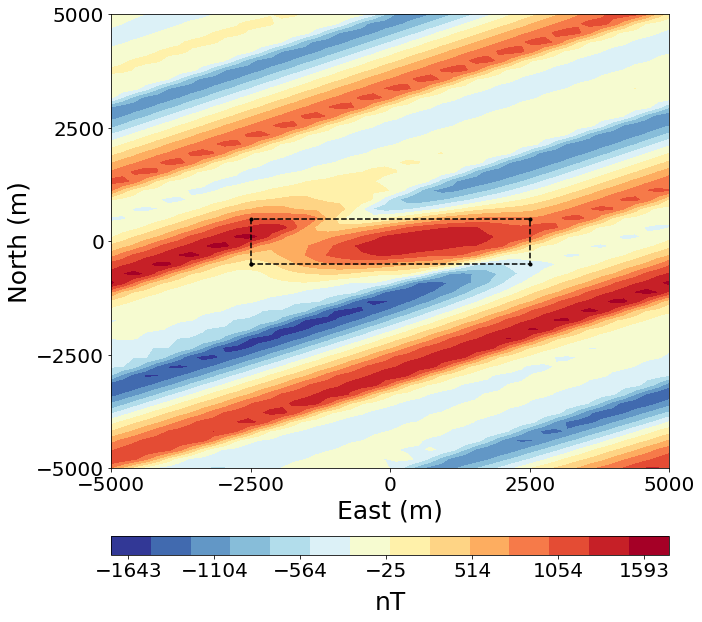

In [49]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpfd, 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpfd, 
                15, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(), 7))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/reducedtopole-fourier-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/reducedtopole-fourier-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

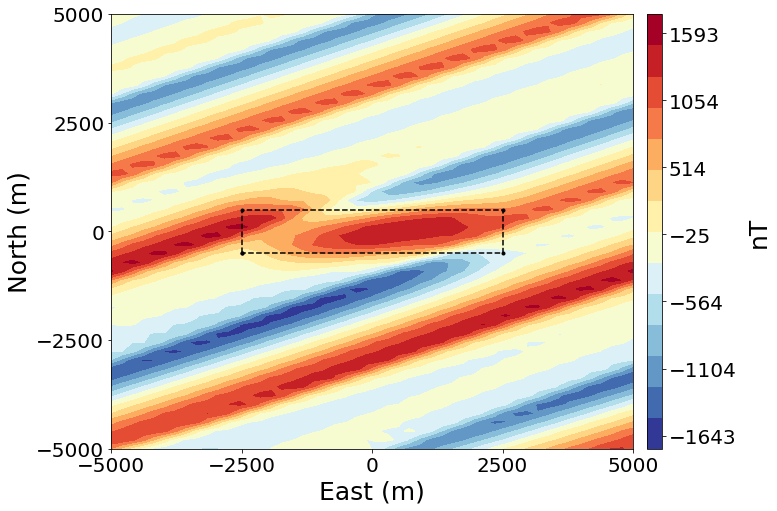

In [50]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
#cc1 = pyplot.contour(yo.reshape(shape), xo.reshape(shape), rtpfd, 
#                15, colors = 'k', linestyle = 'solid', linewidths = 0.75)
#cl = pyplot.clabel(cc1, inline = 1, fontsize = 10, fmt = '%1.0f', 
#                   manual = [(-500., 2500.), (0., 0.), (500., 2000.), (3000., -1000.)])
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpfd, 
                15, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(), 7))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/reducedtopole-fourier-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/reducedtopole-fourier-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# (2) Multidomain cross-correlation between total gradient and vertical gradient of the reduced to pole data

In [51]:
# Define the search area for multidomain correlation
inclination = numpy.linspace(-90., 90., 13)
declination = numpy.linspace(-90., 90., 13)
dec, inc = numpy.meshgrid(declination, inclination)

In [52]:
# Create the empty vector --> SD means space domain
res_sd = numpy.zeros_like(dec)

In [53]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = equivalentlayer.rtp_layer(mydata, shape, mylayer, shapel, 0.0001, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp.reshape(shape)),
                                                derivative.zderiv(xobs, yobs, rtp.reshape(shape)))
        else:
            rtp = filtering.reduction(xobs, yobs, dobs, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(xobs, yobs, rtp), 
                                                derivative.zderiv(xobs, yobs, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

Calculation process (in seconds): 194.809


In [54]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_sd, 'no unit')

Minimum:    -0.1487 no unit
Maximum:    0.6815 no unit
Mean value: 0.1461 no unit
Variation:  0.8303 no unit


In [55]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_sd == res_sd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: 0.0 0.0


# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_sd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 12, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

#pyplot.savefig('figs/ccsd-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,8))
ccfd = pyplot.contour(dec, inc, res_sd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 12, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decm, incm, 'bo', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

#pyplot.savefig('figs/ccsd-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/ccsd-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [56]:
# Interpolate for the low latitude values
areai = (-20., 20., -90., 90)
shapei = (361, 181)
inci, deci = grids.regular_grid(areai, shapei)

In [57]:
# We have to interpolate the data just in order to make it smoother
datai = scipy.interpolate.griddata((inc.reshape(inc.size), dec.reshape(dec.size)), 
                 res_sd.reshape(res_sd.size), (inci, deci), method = 'cubic')

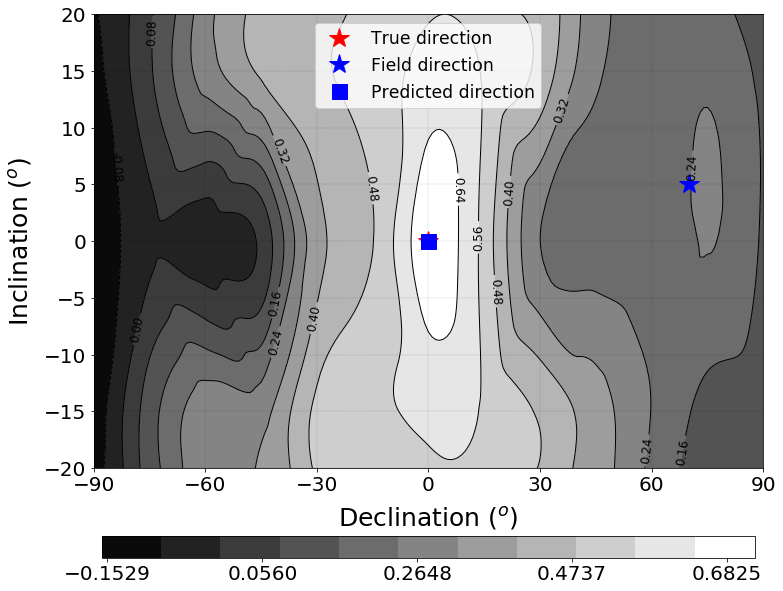

In [58]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/review03-zoom-correlation-space-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review03-zoom-correlation-space-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,8))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/north-synthetic-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/north-synthetic-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(12,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 10, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(deci.reshape(shapei), inci.reshape(shapei), s = datai.reshape(shapei), c = 'gray', vmin = datai.min(), vmax = datai.max())
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(deci.min(), deci.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inci.min(), inci.max(), 9), fontsize = 20)
pyplot.xlim(deci.min(), deci.max())
pyplot.ylim(inci.min(), inci.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

#pyplot.savefig('figs/north-synthetic-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
#pyplot.savefig('figs/north-synthetic-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [59]:
# Apply the RTP by using the encountered direction
rtp_test = equivalentlayer.rtp_layer(mydata, shape, mylayer, shapel, 0.0001, incf, decf, incm, decm)

In [60]:
# Computes the total and horizontal gradients
tga_test = derivative.totalgrad(xobs, yobs, rtp_test.reshape(shape))
hga_test = derivative.zderiv(xobs, yobs, rtp_test.reshape(shape))

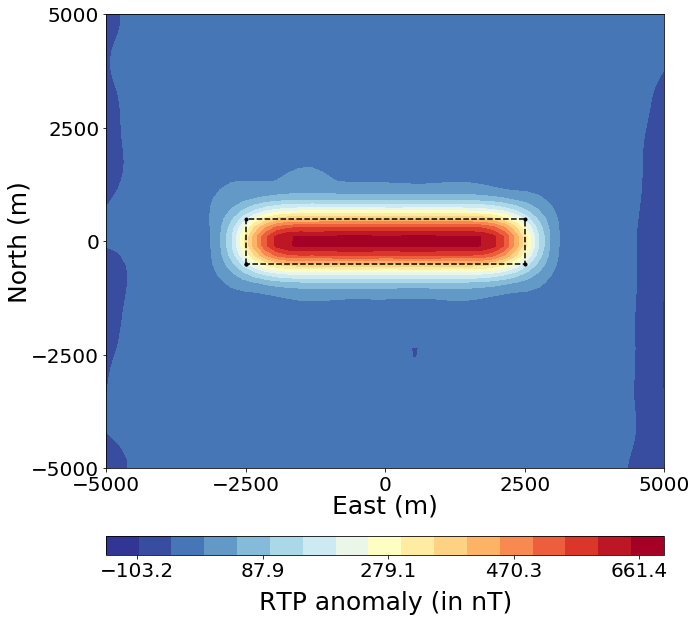

In [62]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtp_test.reshape(shape), 
                15, vmin = rtp_test.min(), vmax = rtp_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtp_test.min(), rtp_test.max(), 5))
cb.set_clim(rtp_test.min(), rtp_test.max())
cb.set_label('RTP anomaly (in nT)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.savefig('figs/review04a-rtp-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review04a-rtp-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

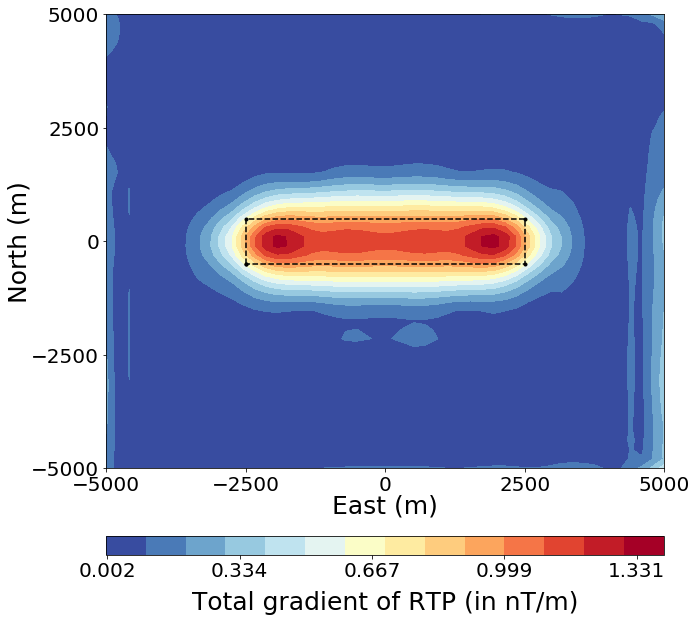

In [63]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), tga_test, 
                15, vmin = tga_test.min(), vmax = tga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(tga_test.min(), tga_test.max(), 5))
cb.set_clim(tga_test.min(), tga_test.max())
cb.set_label('Total gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)

pyplot.savefig('figs/review04b-tga-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review04b-tga-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

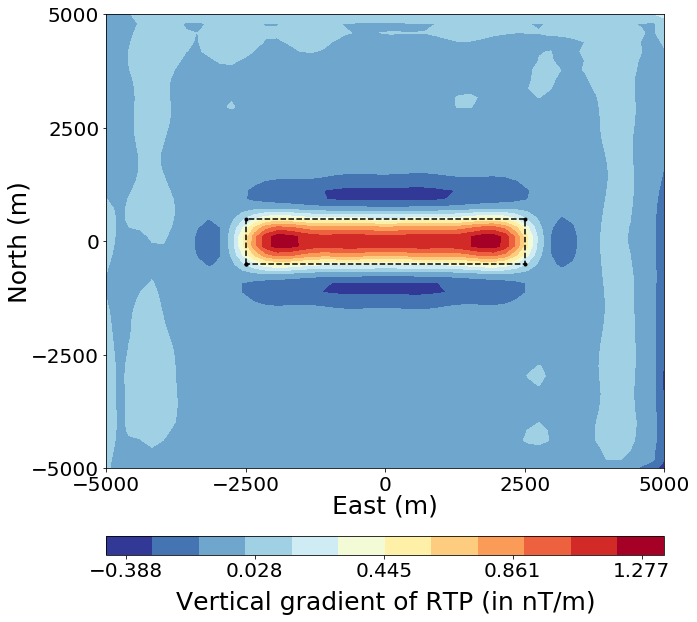

In [73]:
# Plotting the contour map
pyplot.figure(figsize=(10,10))

cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), hga_test, 
                15, vmin = hga_test.min(), vmax = hga_test.max(), cmap = pyplot.cm.RdYlBu_r, )
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(hga_test.min(), hga_test.max(), 5))
cb.set_clim(hga_test.min(), hga_test.max())
cb.set_label('Vertical gradient of RTP (in nT/m)', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 0)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 0)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/review04b-hga-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/review04b-hga-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [65]:
# We have to interpolate the data just in order to make it smoother
areai = (-90., 90., -90., 90)
shapei = (181, 181)
inci, deci = grids.regular_grid(areai, shapei)

In [66]:
# Interpolated
datai = scipy.interpolate.griddata((inc.reshape(inc.size), dec.reshape(dec.size)), 
                 res_sd.reshape(res_sd.size), (inci, deci), method = 'cubic')

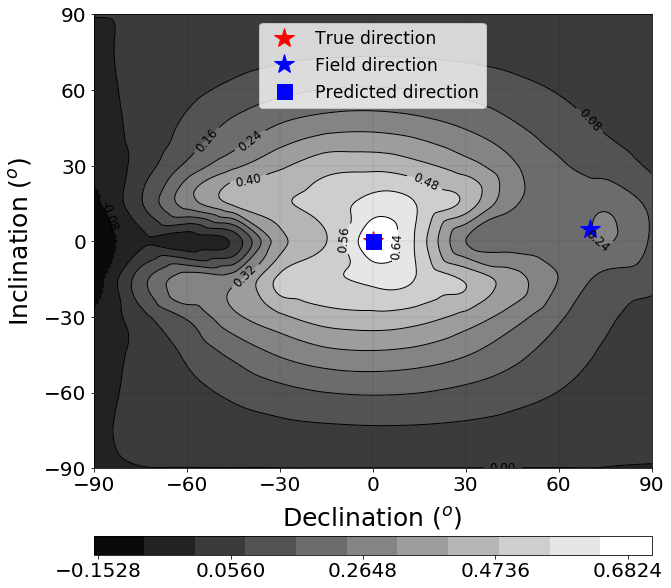

In [67]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

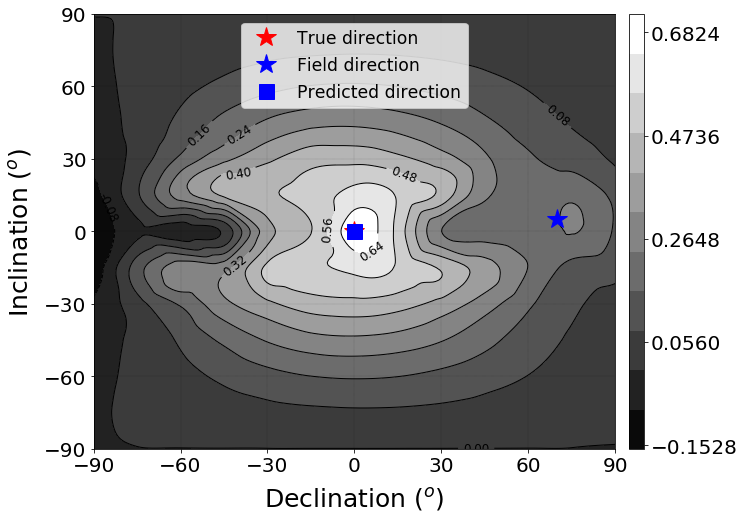

In [68]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 8))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

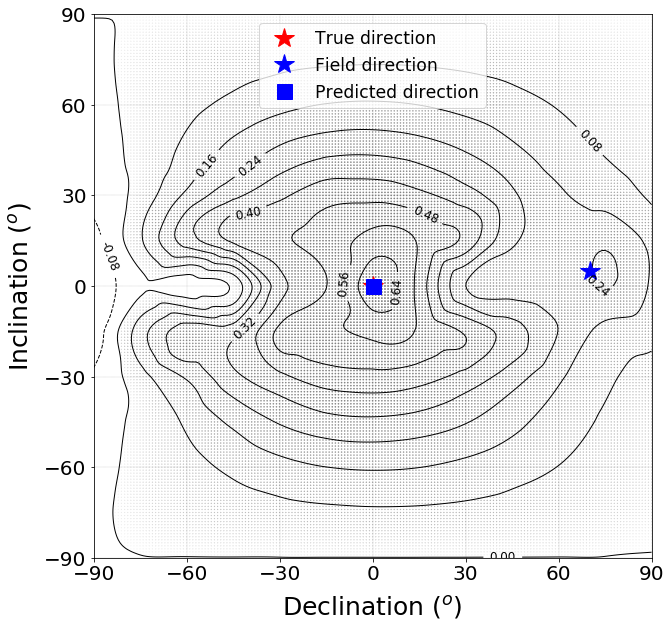

In [69]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(deci.reshape(shapei), inci.reshape(shapei), s = datai.reshape(shapei), c = 'gray', vmin = datai.min(), vmax = datai.max())
pyplot.plot(decs, incs, 'r*', label = 'True direction', markersize = 20)
pyplot.plot(decf, incf, 'b*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/synthetic-correlation-r1(scatter).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/synthetic-correlation-r1(scatter).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [70]:
# Test the encountered direction by applying the reduction to pole
rtpsd = equivalentlayer.rtp_layer(mydata, shape, mylayer, shapel, 0.0001, incf, decf, incm, decm)

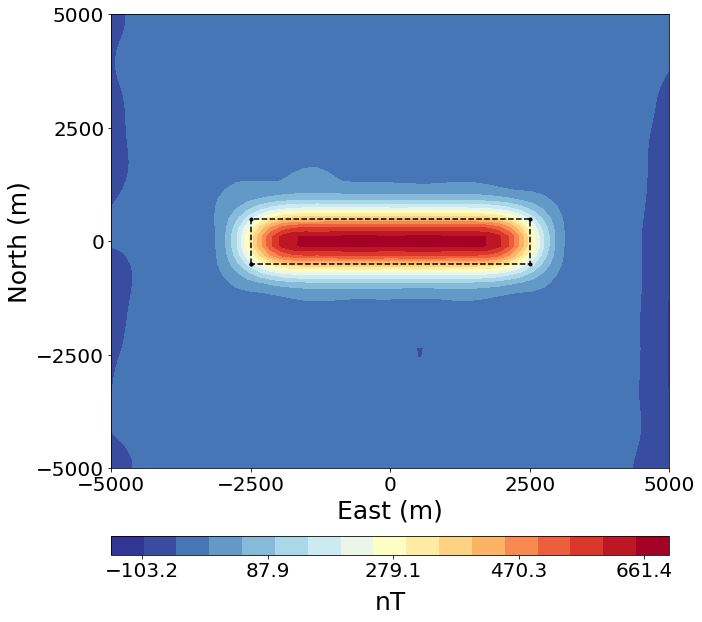

In [71]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
                15, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/reducedtopole-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/reducedtopole-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

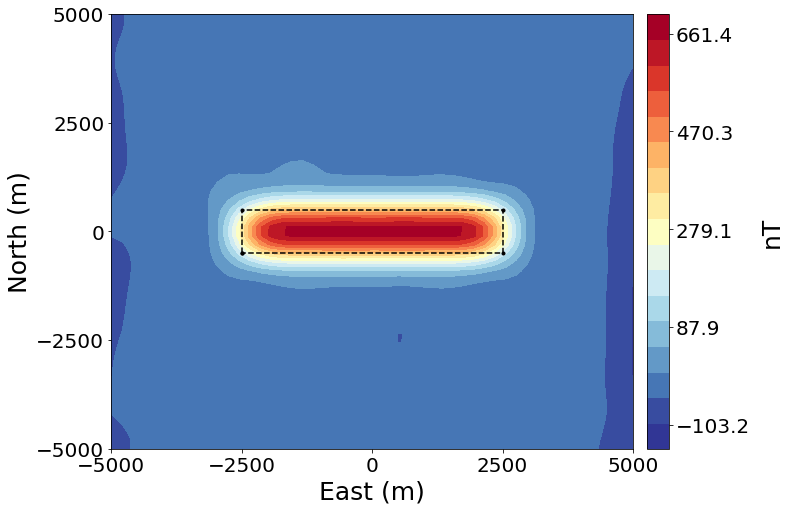

In [72]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(yo.reshape(shape), xo.reshape(shape), rtpsd.reshape(shape), 
                15, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 20, fraction = 0.04, orientation = 'vertical', pad = 0.025)
plot.draw_prism(dikemodel[:4], linewidth = 1., style = '.--k',  xy2ne=True)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('East (m)', fontsize = 25, labelpad = 5)
pyplot.ylabel('North (m)', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(yo.min(), yo.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(xo.min(), xo.max(), 5), fontsize = 20)
pyplot.savefig('figs/reducedtopole-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/reducedtopole-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()